In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

insurance= pd.read_csv('insurance.csv')
print(insurance.columns)
insurance.corr()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Above, we can see that age has a .3 correlation with charges, bmi has a .2 correlation, and children has a .07 correlation.

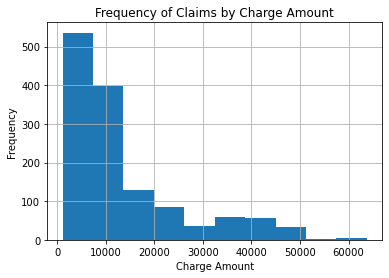

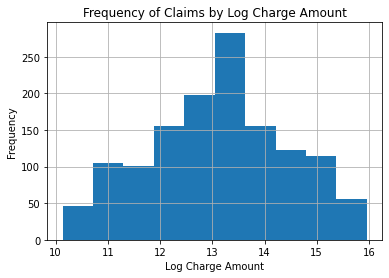

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

insurance.hist('charges')
plt.title("Frequency of Claims by Charge Amount")
plt.xlabel("Charge Amount")
plt.ylabel("Frequency")
plt.show()

insurance["log_charges"] = np.log2(insurance["charges"])

insurance.hist('log_charges')
plt.title("Frequency of Claims by Log Charge Amount")
plt.xlabel("Log Charge Amount")
plt.ylabel("Frequency")
plt.show()

Above, we can see that the Frequency of Claims by Charge Amount is skewed to the left, so we take the log of the Charge Amount to get a more normal distribution. Now we must investigate how the categorical columns affect charges.

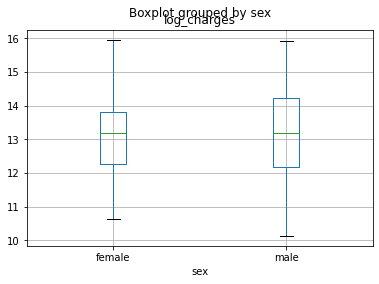

In [3]:
insurance.boxplot("log_charges", "sex")
plt.show()

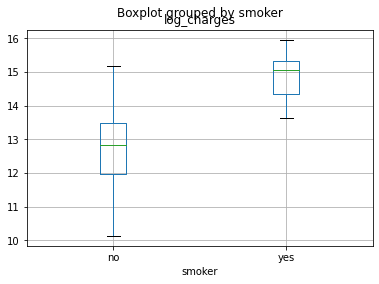

In [4]:
insurance.boxplot(column = ["log_charges"], by = "smoker")
plt.show()

<AxesSubplot:title={'center':'log_charges'}, xlabel='region'>

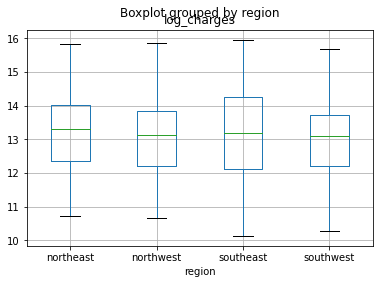

In [5]:
insurance.boxplot(column = ["log_charges"], by = "region")

Males seem to have a wider distribution of charges compared to women. Smokers have much higher costs than non-smokers. However, region seems to have little impace on charges. It appears as though age, bmi, and smoker will be the best variables to use on our analysis, as they appear to cause most of the variation in charges.

In [6]:
insurance= pd.get_dummies(data= insurance, columns= ['smoker'])
X= insurance[["age", "bmi", "smoker_yes"]]
y= insurance['log_charges']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= .2, random_state= 69)

In [11]:
model= LinearRegression()
model.fit(X_train, y_train)
y_prediction= model.predict(X_train)
error= mean_squared_error(y_train, y_prediction)
scale_error = np.exp(mean_squared_error(y_train, y_prediction))

print("The R^2 score of our model is {}. Meaning our variables account for {}% of the variation in the insurance charge of an individual. Also, the mean squared error of our prediction is {} and the mean squared error on the original charges scale is {}.".format(r2_score(y_train, y_prediction), round(r2_score(y_train, y_prediction)*100, 2), error, scale_error))

The R^2 score of our model is 0.7470778318195639. Meaning our variables account for 74.71% of the variation in the insurance charge of an individual. Also, the mean squared error of our prediction is 0.43022752470363845 and the mean squared error on the original charges scale is 1.537607327403743.


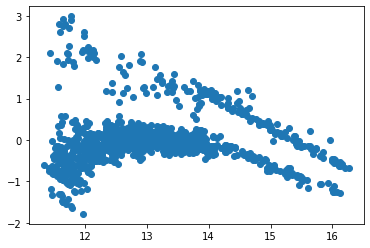

In [10]:
residuals= y_train- y_prediction

plt.scatter(y_prediction, residuals)
plt.show()

We expect the plot of our residuals to roughly cluster along y=0, but here we see this is not the case so we do not have a "perfect" regression. 

In [12]:
print(model.intercept_)
model.coef_

10.153413218749813


array([0.05095108, 0.01690872, 2.25865991])

The above intercept cannot be considered a valid value in our model, as we would be assuming the age of our driver is 0. Otherwise, the age coefficient implies for every year a driver ages, their charges increase by .05 on the log scale, or by 5%. The bmi coefficient implies that for evey unit increase in bmi, there is a .017 increase in log charges, or a 2% increase in charges. Finally, the smoker coefficient indicates that if you are a smoker, you will face 2.25 in additional log charges, or a 950% increase in charges.

In [19]:
test_prediction= model.predict(X_test)
test_mse= mean_squared_error(y_test, test_prediction)
scale_test_mse = np.exp(mean_squared_error(y_test, test_prediction))
print(test_mse, scale_test_mse)

0.5259404964068513 1.6920494667200927


Above, we can see that the mse is only slightly larger here than it was for our training data. Therefore, we can conclude that our model was not overfitted. The residuals suggest that our model is generally prediction insurance costs as being lower than they are in reality. 